# Project: Recommendation System
# By: Krishna Kant Kaushal
# Python version used: Python 3.7.3

🥏Data Description:

    Amazon Reviews data (​data source​). The repository has several datasets. For this case study, we are using
    the Electronics dataset.

🥏Domain:

    E-commerce

🥏Context:

    Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different
    suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales
    to massive data sets and produces high-quality recommendations in real-time.

🥏Attribute Information:

    ● userId: Every user identified with a unique id 
    ● productId: Every product identified with a uniqueid
    ● Rating: Rating of the corresponding product by  the corresponding user
    ● timestamp :Time of the rating(ignore this column for this exercise)

🥏Learning Outcomes:
    
    ● Exploratory Data Analysis
    ● Creating a Recommendation system using real data 
    ● Collaborative filtering

🥏Objective:
    
    Build a recommendation system to recommend products to customers based on the their previous ratings
    for other products.

🥏Steps and tasks:

    ✓1. Read and explore the given dataset. 
        (Rename column/add headers, plot histograms, find data characteristics) - (2.5 Marks)
    ✓2. Take a subset of the dataset to make it less sparse/ denser.
        (For example, keep the users only who has given 50 or more number of ratings ) - (2.5 Marks)
    ✓3. Split the data randomly into train and test dataset.
        (For example, split it in 70/30 ratio) - (2.5 Marks)
    ✓4. Build Popularity Recommender model. - (20 Marks)
    ✓5. Build Collaborative Filtering model. - (20 Marks)
    ✓6. Evaluate both the models.
        (Once the model is trained on the training data, it can be used to compute the error(RMSE)
        on predictions made on the test data.) - (7.5 Marks)
    ✓7. Get top - K ( K = 5) recommendations. 
        Since our goal is to recommend new products for each user based on his/her habits, we will 
        recommend 5 new products. - (7.5 Marks)
    ✓8. Summarise your insights. - (7.5 marks)

### Import the necessary libraries

In [ ]:
# for arrays and matrices
import numpy as np
from numpy import array
from numpy import diag
from numpy import dot

from scipy.linalg import svd

# for importingimport  data and data analysis
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

from collections import defaultdict

from surprise import SVD
from surprise import Dataset

# 1. Read and explore the given dataset

#### Adding headers

In [ ]:
# Reading the dataset fron .csv file 
eds = pd.read_csv('ratings_Electronics.csv')

In [ ]:
# Adding headers:
columns = ["userId","productId","ratings","timestamp"]
eds.columns = columns

In [ ]:
# drop timestamp as it doesn't help in recommendations
eds.drop("timestamp",axis=1, inplace=True)
eds

,userId,productId,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0
5,A3J3BRHTDRFJ2G,0511189877,2.0
6,A2TY0BTJOTENPG,0511189877,5.0
7,A34ATBPOK6HCHY,0511189877,5.0
8,A89DO69P0XZ27,0511189877,5.0
9,AZYNQZ94U6VDB,0511189877,5.0


##### Lets Check presence of missing value

In [ ]:
print('Number of Missing Values by Attributes:\n')
print(eds.isnull().sum())

Number of Missing Values by Attributes:

userId       0
productId    0
ratings      0
dtype: int64


** Comment(s):
    1. There are no missing values in dataset.

In [ ]:
eds.head()

,userId,productId,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


#### Plotting histograms

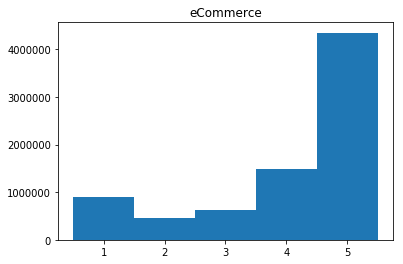

In [ ]:
plt.hist(eds["ratings"], bins = [.5, 1.5,2.5,3.5,4.5,5.5]) 
plt.title("eCommerce")
plt.show()

** Comment(s):
    1. More than half of the products have been rated 5 star. So it more likely that these movies
        will be reccommended.

#### find data characteristics

In [ ]:
eds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


** Comment(s):
    1. As userId and productId are labels, the should be of object type which they are. 
        So no need to change thier types.
    2. Ratings are in float64 format. Again there is no need to change it.

In [ ]:
print('eds dataset size: ',eds.size)
print('eds dataset shape: ',eds.shape)

eds dataset size:  23473443
eds dataset shape:  (7824481, 3)


** Comment(s):
    1. The number of rows in data set is huge - no wonder it's taking more time to read the dataset than
        it usual takes.
    2. For the first time I am using dataset with more than 7 million rows.

##### Lets take a look at Five-number summary:

In [ ]:
eds.describe()

,ratings
count,7.824481e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


** Comment(s):
    1. The number of rows is huge - 7.8 millions.
    2. 50th and 75th percintile are equal to max which is what we saw in histogram.

# 2. Take a subset of the dataset to make it less sparse/ denser.

#### Lets only keep the users only who has given more  than 50 ratings

In [ ]:
# Lets get users rating count given by all 'userId' and add "users_rating_count" column the count:
eds["users_rating_count"] = eds.groupby("userId")["ratings"].transform("count")
eds.head()

,userId,productId,ratings,users_rating_count
0,A2CX7LUOHB2NDG,0321732944,5.0,4
1,A2NWSAGRHCP8N5,0439886341,1.0,1
2,A2WNBOD3WNDNKT,0439886341,3.0,1
3,A1GI0U4ZRJA8WN,0439886341,1.0,1
4,A1QGNMC6O1VW39,0511189877,5.0,2


In [ ]:
# Drop indexes for "users_rating_count"<=50, and dropping "users_rating_count" column
eds_m = eds.drop(eds[eds.users_rating_count <= 50].index)[['userId','productId','ratings']]
print(eds_m.head())
eds_m.shape

             userId   productId  ratings
117   AT09WGFUM934H  0594481813      3.0
176  A32HSNCNPRUMTR  0970407998      1.0
177  A17HMM1M7T9PJ1  0970407998      4.0
491  A3CLWR1UUZT6TG  0972683275      5.0
630  A3TAS1AG6FMBQW  0972683275      5.0


(122171, 3)

! Validation:
    
    . Just to cross check that rows with userId "A2CX7LUOHB2NDG"(has total 4 ratings)have actually dropped.
    . It should be 0.

In [ ]:
eds_m.loc[eds_m["userId"]=="A2CX7LUOHB2NDG"]["ratings"].count()

0

** Comment(s):
    1. eds_m is basically our dataframe with userIds having given more than 50 ratings.

#### Now lets keep the products only which has been given more than 50 ratings

In [ ]:
# Lets get product rating count given to all 'productId' and add "product_rating_count" column the count:
eds["product_rating_count"] = eds.groupby("productId")["ratings"].transform("count")
eds.head()

,userId,productId,ratings,users_rating_count,product_rating_count
0,A2CX7LUOHB2NDG,0321732944,5.0,4,1
1,A2NWSAGRHCP8N5,0439886341,1.0,1,3
2,A2WNBOD3WNDNKT,0439886341,3.0,1,3
3,A1GI0U4ZRJA8WN,0439886341,1.0,1,3
4,A1QGNMC6O1VW39,0511189877,5.0,2,6


In [ ]:
eds_m2 = eds.drop(eds[eds["product_rating_count"] <= 50].index)[["userId", "productId", "ratings"]]
print(eds_m2.head())

             userId   productId  ratings
182  A1BKC6B7YHYTVV  0972683275      4.0
183   AWVFSIB42LHKJ  0972683275      4.0
184  A36MQBNADRH8YY  0972683275      5.0
185  A3SRXMPLAEZ6DP  0972683275      4.0
186  A20XXTXWF2TCPY  0972683275      5.0


! Validation:
    
    . Just to cross check that rows with productId "A1QGNMC6O1VW39"(has total 6 ratings)have actually dropped.
    . It should be 0.

In [ ]:
eds_m2.loc[eds_m2["productId"]=="A1QGNMC6O1VW39"]["ratings"].count()

0

In [ ]:
eds_m2.shape

(5350913, 3)

** Comment(s):
    1. eds_m2 is basically our dataframe with productIds having more than 50 ratings.
    2. The shape of eds_m2 is huge even after removing products having 50 or less ratings.

# 3. Split the data randomly into train and test dataset.
    (For example, split it in 70/30 ratio)

##### Splitting the Dataset created from DataFrame into train set and test set.

In [ ]:
# A reader is needed with rating_scale param
reader = Reader(rating_scale=(1, 5))

# Converting DataFrame into dataset
eds_data = Dataset.load_from_df(eds_m[['userId', 'productId', 'ratings']], reader)
print(eds_data)

# Splitting dataset into train set and test set
trainSet, testSet = train_test_split(eds_data, test_size=.3)

# 4. Build Popularity Recommender model.

In [ ]:
# Count of user for each unique product as recommendation score 
eds_data = eds_m.groupby('productId').agg({'ratings': 'count'}).reset_index()
eds_data.rename(columns = {'ratings': 'score'},inplace=True)
eds_data.head()

,productId,score
0,0594481813,1
1,0970407998,2
2,0972683275,3
3,1400501466,5
4,1400501520,1


In [ ]:
# Sort the products on recommendation score 
eds_data_sort = eds_data.sort_values(['score', 'productId'], ascending = [0,1])
eds_data_sort.head()

,productId,score
38146,B0088CJT4U,204
24262,B003ES5ZUU,177
10820,B000N99BBC,163
37407,B007WTAJTO,156
37765,B00829TIEK,146


In [ ]:
# Generate a recommendation rank based upon score 
eds_data_sort['Rank'] = eds_data_sort['score'].rank(ascending=0, method='first')

In [ ]:
# Get the top 5 recommendations 
popularity_recommendations = eds_data_sort.head(5) 
popularity_recommendations 

,productId,score,Rank
38146,B0088CJT4U,204,1.0
24262,B003ES5ZUU,177,2.0
10820,B000N99BBC,163,3.0
37407,B007WTAJTO,156,4.0
37765,B00829TIEK,146,5.0


** Comment(s):
    1. The popularity recommender model get the same recommendations for all users - old and new.

# 5. Build Collaborative Filtering model.

In [ ]:
# Instantiating the KNNWithMeans algorithm with user-user collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})

In [ ]:
algo.fit(trainSet)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


# 6. Evaluate both the models.
    (Once the model is trained on the training data, it can be used to compute the error(RMSE)
    on predictions made on the test data.)

#### Evaluation of Popularity Recommender model

For Popularity Recommender model, the recommendation is same for all user.

#### Evaluation of Collaborative Filtering model.

In [ ]:
# we can query for specific predicions
uid = str("A2NLI1M5K2MQ5E")  # raw user id
iid = str("B007WTAJTO")  # raw item id

In [ ]:
# Lets get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: A2NLI1M5K2MQ5E item: B007WTAJTO r_ui = None   est = 4.59   {'actual_k': 2, 'was_impossible': False}


In [ ]:
# Now lets run the trained model against the testset
test_pred = algo.test(testSet)

In [ ]:
test_pred[:5]

[Prediction(uid='A3D1TZH619NKHN', iid='B0037TRWTI', r_ui=5.0, est=4.282608695652174, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ADLVFFE4VBT8', iid='B00F0DD0I6', r_ui=5.0, est=4.266459114443525, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid='A1EH2S92FHWZRP', iid='B0073FE1F0', r_ui=4.0, est=2.72466772344836, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3QNX5KWHDV0GD', iid='B00746LVOM', r_ui=5.0, est=3.3230769230769233, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AG35JCCQWDRCS', iid='B000AAZQJU', r_ui=5.0, est=4.6455696202531644, details={'actual_k': 0, 'was_impossible': False})]

In [ ]:
# Computing RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0561


1.0561097169663567

** Comment(s):
    
    1. RMSE of value is 1.0374. 

# 7. Get top - K ( K = 5) recommendations. 
    Since our goal is to recommend new products for each user based on his/her habits, we will 
    recommend 5 new products.

#### Getting top 5 recommendations using Popularity Recommender model:

In [ ]:
eds_data = eds_m.groupby('productId').agg({'ratings': 'count'}).reset_index()
eds_data.rename(columns = {'ratings': 'score'},inplace=True)
eds_data.head()
# Sort the products on recommendation score 
eds_data_sort = eds_data.sort_values(['score', 'productId'], ascending = [0,1])
eds_data_sort.head()
# Generate a recommendation rank based upon score 
eds_data_sort['Rank'] = eds_data_sort['score'].rank(ascending=0, method='first')
# Get the top 5 recommendations 
popularity_recommendations = eds_data_sort.head(5) 
popularity_recommendations 

,productId,score,Rank
38146,B0088CJT4U,204,1.0
24262,B003ES5ZUU,177,2.0
10820,B000N99BBC,163,3.0
37407,B007WTAJTO,156,4.0
37765,B00829TIEK,146,5.0


In [ ]:
def popularity_recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations.loc['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [ ]:
popularity_recommend(15)

,Rank,productId,score
38146,1.0,B0088CJT4U,204
24262,2.0,B003ES5ZUU,177
10820,3.0,B000N99BBC,163
37407,4.0,B007WTAJTO,156
37765,5.0,B00829TIEK,146
userId,15.0,15,15


#### Getting top 5 recommendations using Collaborative Recommender model:

In [ ]:
# create a function to recommend top 5 recommendations
def collaborative_recommend(user):     
    df = pd.DataFrame(test_pred)
    test_grp = df.groupby('uid')
    test_grpDf = test_grp.get_group(user)
    items_reco = test_grpDf.sort_values('est', ascending=False).head(5)
          
    return items_reco.drop(['r_ui', 'details'], axis=1)

In [ ]:
collaborative_recommend("A2NLI1M5K2MQ5E")

,uid,iid,est
18741,A2NLI1M5K2MQ5E,B004GZRE1S,4.920290
35177,A2NLI1M5K2MQ5E,B000DZH9H4,4.586957
23851,A2NLI1M5K2MQ5E,B005NX7HY6,4.586957
3155,A2NLI1M5K2MQ5E,B00EH5UGR6,4.586957
6932,A2NLI1M5K2MQ5E,B0018MPQBM,4.586957


# 8. Summarise your insights.

1. Popularity Recommender model:

    Theoratically we know that for Popularity Recommender model, the recommendation is same
    for all user - old new  as it's not a personalized recommendation. Same has been demostrated below.
    
    The problem with popularity based recommendation system is that the personalization is not
    available with this method. This problem is not there with collaborative filtering model.

In [ ]:
popularity_recommend("A2NLI1M5K2MQ5E")

,Rank,productId,score
38146,1,B0088CJT4U,204
24262,2,B003ES5ZUU,177
10820,3,B000N99BBC,163
37407,4,B007WTAJTO,156
37765,5,B00829TIEK,146
userId,A2NLI1M5K2MQ5E,A2NLI1M5K2MQ5E,A2NLI1M5K2MQ5E


In [ ]:
popularity_recommend("AM0QLU79O05JR")

,Rank,productId,score
38146,1,B0088CJT4U,204
24262,2,B003ES5ZUU,177
10820,3,B000N99BBC,163
37407,4,B007WTAJTO,156
37765,5,B00829TIEK,146
userId,AM0QLU79O05JR,AM0QLU79O05JR,AM0QLU79O05JR


2. Collaborative Recommender model:
    
    For each user, recommender systems recommend items based on how similar users liked the item.
    Same has been demostrated below

In [ ]:
collaborative_recommend("A2NLI1M5K2MQ5E")

,uid,iid,est
18741,A2NLI1M5K2MQ5E,B004GZRE1S,4.920290
35177,A2NLI1M5K2MQ5E,B000DZH9H4,4.586957
23851,A2NLI1M5K2MQ5E,B005NX7HY6,4.586957
3155,A2NLI1M5K2MQ5E,B00EH5UGR6,4.586957
6932,A2NLI1M5K2MQ5E,B0018MPQBM,4.586957


In [ ]:
collaborative_recommend("AM0QLU79O05JR")

,uid,iid,est
2361,AM0QLU79O05JR,B000B6D39I,5.000000
33805,AM0QLU79O05JR,B00067TTY0,4.471546
24780,AM0QLU79O05JR,B000U3JR8S,4.263801
15258,AM0QLU79O05JR,B007KPIMXK,4.263801
10756,AM0QLU79O05JR,B00IVEHCVW,4.263801
